**Nama Kelompok:**

1.   Muhammad iqbal agistany - OPTIMA
2.   Farry Christo Rangian - OPTIMA
3.   Yogi Ardiansyah Nugraha - Alfatih
4.   Beni Safangat - Jatayu
5.   Shalih - Alfatih
6.   Ivan Dwi Nur Azzahri - Data Ranger

In [1]:
import os 
import zipfile

local_zip = '/content/train.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')

local_zip = '/content/valid.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
train_tumor_dir = os.path.join('/content/train/tumor')

train_tidak_dir = os.path.join('/content/train/tidak')

valid_tumor_dir = os.path.join('/content/valid/tumor')

valid_tidak_dir = os.path.join('/content/valid/tidak')

In [3]:
train_tumor_names = os.listdir(train_tumor_dir)
print(train_tumor_names[:10])

train_tidak_names = os.listdir(train_tidak_dir)
print(train_tidak_names[:10])

valid_tumor_names = os.listdir(valid_tumor_dir)
print(valid_tumor_names[:10])

valid_tidak_names = os.listdir(valid_tidak_dir)
print(valid_tidak_names[:10])

['Y24.jpg', 'Y66.JPG', 'Y67.JPG', 'Y59.JPG', 'Y157.JPG', 'Y167.JPG', 'Y6.jpg', 'Y21.jpg', 'Y161.JPG', 'Y155.JPG']
['1 no.jpeg', '19 no.jpg', '40 no.jpg', 'no 89.jpg', '33 no.jpg', 'no 6.jpg', '29 no.jpg', '3 no.jpg', '25 no.jpg', 'N16.jpg']
['Y251.JPG', 'Y246.JPG', 'Y185.jpg', 'Y247.JPG', 'Y243.JPG', 'Y245.jpg', 'Y253.JPG', 'Y182.JPG', 'Y187.jpg', 'Y195.JPG']
['No16.jpg', 'no 99.jpg', 'no 95.jpg', 'No13.jpg', 'No17.jpg', 'No20.jpg', 'no 96.jpg', 'No14.jpg', 'No18.jpg', 'No12.jpg']


In [4]:
print('total tumor training images : ', len(os.listdir(train_tumor_dir)))
print('total tidak training images : ', len(os.listdir(train_tidak_dir)))
print('total tumor validation images : ', len(os.listdir(valid_tumor_dir)))
print('total tidak validation images : ', len(os.listdir(valid_tidak_dir)))

total tumor training images :  124
total tidak training images :  78
total tumor validation images :  31
total tidak validation images :  20


CNN

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

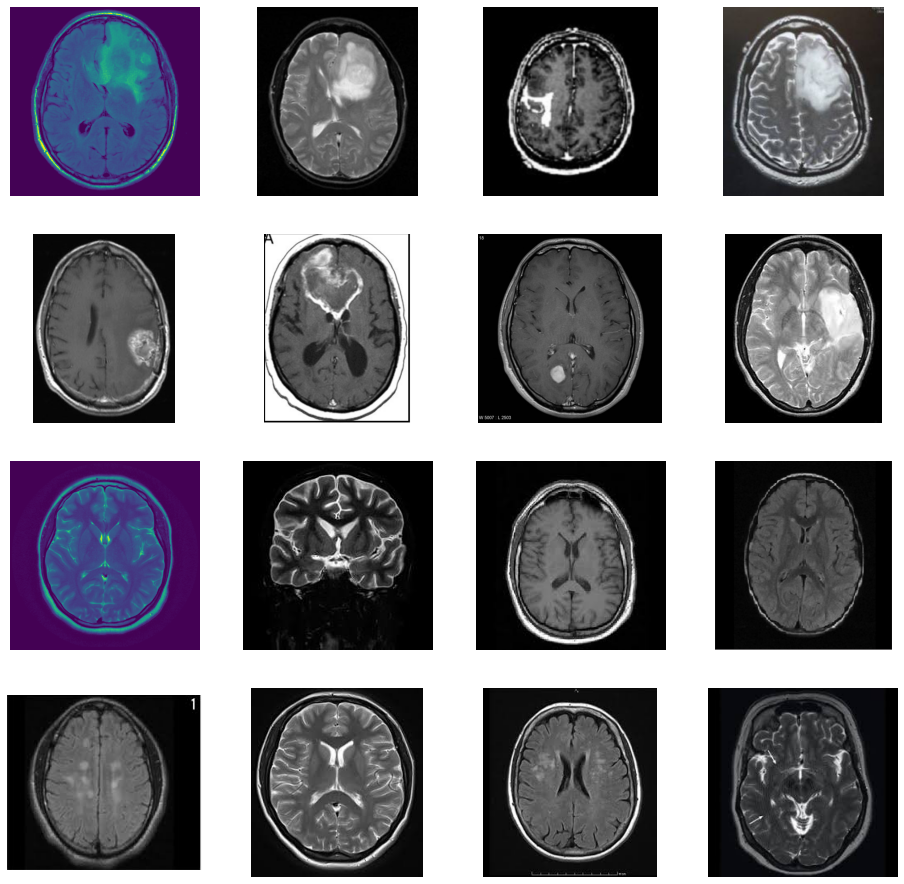

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_tumor_pic = [os.path.join(train_tumor_dir, fname)
                      for fname in train_tumor_names[pic_index-8:pic_index]]
next_tidak_pic = [os.path.join(train_tidak_dir,fname)
                  for fname in train_tidak_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_tumor_pic + next_tidak_pic):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/train/',
    classes = ['tumor','tidak'],
    target_size=(200,200),
    batch_size = 60,
    class_mode='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    '/content/valid/',
    classes = ['tumor','tidak'],
    target_size=(200,200),
    batch_size=10,
    class_mode='binary',
    shuffle=False
)

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


Modelling

In [9]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    #tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [12]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=4,
                    epochs=20,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=4)

Epoch 1/20
4/4 [==============================] - 3s 314ms/step - loss: 1.3274 - accuracy: 0.4505 - val_loss: 1.1162 - val_accuracy: 0.2250
Epoch 2/20
4/4 [==============================] - 1s 243ms/step - loss: 0.7093 - accuracy: 0.5891 - val_loss: 0.4387 - val_accuracy: 0.7750
Epoch 3/20
4/4 [==============================] - 1s 274ms/step - loss: 0.6011 - accuracy: 0.6386 - val_loss: 0.4419 - val_accuracy: 0.9500
Epoch 4/20
4/4 [==============================] - 1s 269ms/step - loss: 0.5044 - accuracy: 0.7822 - val_loss: 0.5005 - val_accuracy: 0.7750
Epoch 5/20
4/4 [==============================] - 1s 391ms/step - loss: 0.4790 - accuracy: 0.7970 - val_loss: 0.3438 - val_accuracy: 0.9250
Epoch 6/20
4/4 [==============================] - 1s 398ms/step - loss: 0.4372 - accuracy: 0.8119 - val_loss: 0.3086 - val_accuracy: 0.9000
Epoch 7/20
4/4 [==============================] - 1s 286ms/step - loss: 0.3945 - accuracy: 0.8218 - val_loss: 0.3368 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

Evaluation Accuracy,ROC,AUC

In [14]:
model.evaluate(valid_generator)

6/6 [==============================] - 0s 35ms/step - loss: 0.6716 - accuracy: 0.7843


[0.6716253757476807, 0.7843137383460999]

In [15]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
preds = model.predict(valid_generator,verbose=1)

6/6 [==============================] - 0s 29ms/step


In [16]:
fpr,tpr,_=roc_curve(valid_generator.classes,preds)

In [17]:
roc_auc=auc(fpr,tpr)

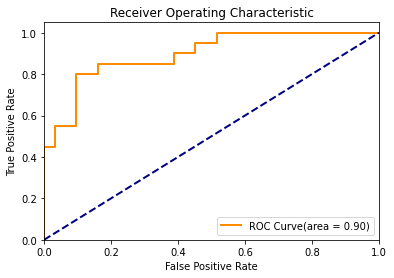

In [18]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw,label='ROC Curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
model.save('model_2.h5')

#Making Predictions

Saving Y92.jpg to Y92.jpg
[0.]
Y92.jpg	HASILNYA: Tumor


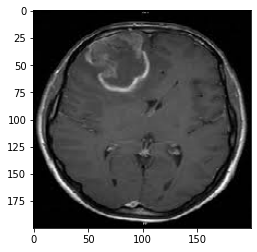

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  path = '/content/'+fn
  img = image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size =10)
  print(classes[0])
  if classes[0] < 0.5:
    print(fn+ "\t" + "HASILNYA: Tumor")
  else:
    print(fn+ "\t" + "HASILNYA: Tidak Tumor")